In [ ]:
# To evaluate marketing performance, I will compare the correlation between the number of events (digital marketing promotion) and sales in each county, gender, and traffic source

In [4]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('/Users/naokikojima/Downloads/orders&events&users&category&event_type.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79968 entries, 0 to 79967
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   79968 non-null  int64  
 1   total_items                               79968 non-null  int64  
 2   total_orders                              79968 non-null  int64  
 3   total_sales                               79968 non-null  float64
 4   category_Accessories                      79968 non-null  float64
 5   category_Intimates                        79968 non-null  float64
 6   category_Plus                             79968 non-null  float64
 7   category_Active                           79968 non-null  float64
 8   category_Socks_and_Hosiery                79968 non-null  float64
 9   category_Maternity                        79968 non-null  float64
 10  category_Socks                    

,user_id,total_items,total_orders,total_sales,category_Accessories,category_Intimates,category_Plus,category_Active,category_Socks_and_Hosiery,category_Maternity,category_Socks,category_Sleep_and_Lounge,category_Tops_and_Tees,category_Leggings,category_Shorts,category_Swim,category_Sweaters,category_Underwear,category_Skirts,category_Blazers_and_Jackets,category_Pants_and_Capris,category_Dresses,category_Jumpsuits_and_Rompers,category_Fashion_Hoodies_and_Sweatshirts,category_Suits_and_Sport_Coats,category_Jeans,category_Pants,category_Outerwear_and_Coats,category_Suits,category_Clothing_Sets,total_events,event_type_cancel,event_type_cart,event_type_department,event_type_home,event_type_product,event_type_purchase,age,gender,country,traffic_source
0,8881,2,2,52.490000,0.000000,2.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10,0,2,2,2,2,2,70,F,China,Search
1,20773,4,4,125.709998,88.709998,0.00,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.00,0.0,20,0,4,4,4,4,4,32,M,Germany,Search
2,41840,3,3,67.470002,3.480000,0.00,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,33.990002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15,0,3,3,3,3,3,34,M,South Korea,Search
3,95498,3,2,41.490000,3.500000,12.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.99,0.0,19,0,5,5,1,5,3,57,F,United States,Search
4,77746,2,2,37.340000,0.000000,3.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.59,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10,0,2,2,2,2,2,31,F,Germany,Search


In [6]:
# Correlation between events & sales, orders, items purchased

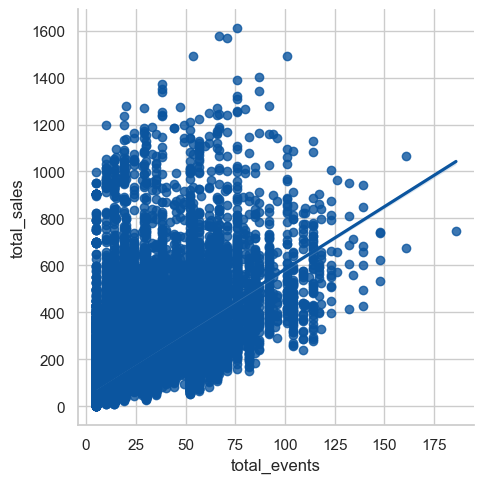

In [8]:
# Correlation between events & sales
# A significant correlation exists between the number of events and sales.
sns.lmplot(x='total_events', y='total_sales', data=df)
plt.show();

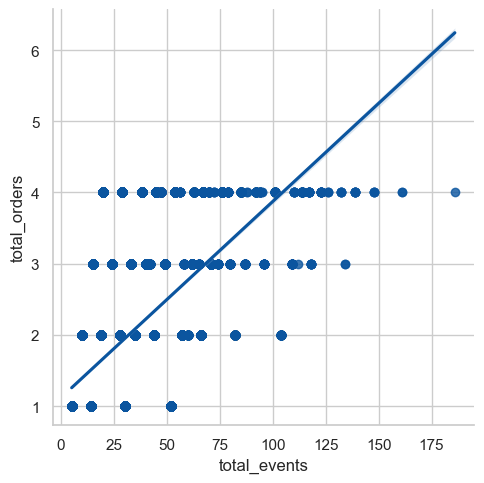

In [9]:
# Correlation between events & orders
# A significant correlation exists between the number of events and orders.
sns.lmplot(x='total_events', y='total_orders', data=df)
plt.show();

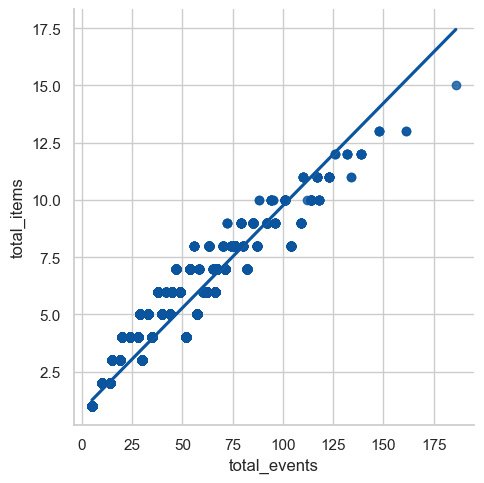

In [10]:
# Correlation between events & items purchased
# A significant correlation exists between the number of events and items purchased.
sns.lmplot(x='total_events', y='total_items', data=df)
plt.show();

In [11]:
# Correlation between events & sales in each country, gender, and traffic source

In [12]:
# Correlation difference in countries
# The correlation between the total number of events and sales is higher in European countries and lower in Asia-Pacific
# However, the top 4 countries in terms of the number of unique users are located in Asia-Pacific.
# So, improving marketing in the Asia-Pacific region is possible by referring to the method in European countries and adjusting them to Asia-Pacific countries.

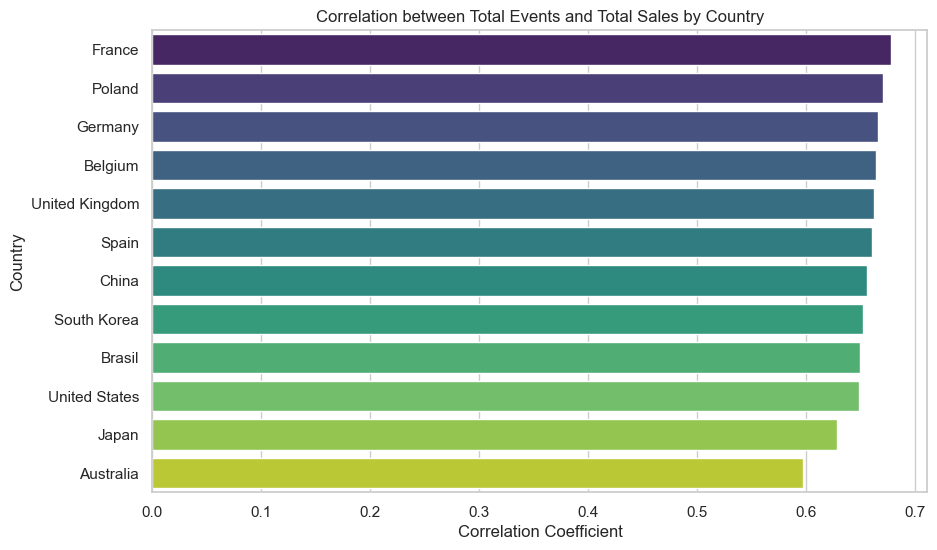

In [14]:
# Correlation difference in countries
# High in European countries and low in Asia-Pacific countries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

country_correlations = df.groupby('country').apply(
    lambda group: group['total_events'].corr(group['total_sales'])
).reset_index(name='correlation')

excluded_countries = ['Austria', 'Colombia', 'España']
country_correlations = country_correlations[~country_correlations['country'].isin(excluded_countries)]

country_correlations = country_correlations.sort_values(by='correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='correlation', y='country', data=country_correlations, palette='viridis')
plt.title('Correlation between Total Events and Total Sales by Country')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Country')
plt.show()

In [15]:
# Count the number of users in each country
# More in Asia-Pacific countries and less in Asia-Pacific countries

country_sample_counts = df.groupby('country').size().reset_index(name='sample_count')

country_sample_counts = country_sample_counts.sort_values(by='sample_count', ascending=False)

print(country_sample_counts)

           country  sample_count
4            China         27222
14   United States         18130
3           Brasil         11813
11     South Korea          4125
13  United Kingdom          3705
7           France          3666
8          Germany          3273
12           Spain          3093
9            Japan          1993
0        Australia          1716
2          Belgium          1015
10          Poland           197
5         Colombia            14
1          Austria             5
6           España             1


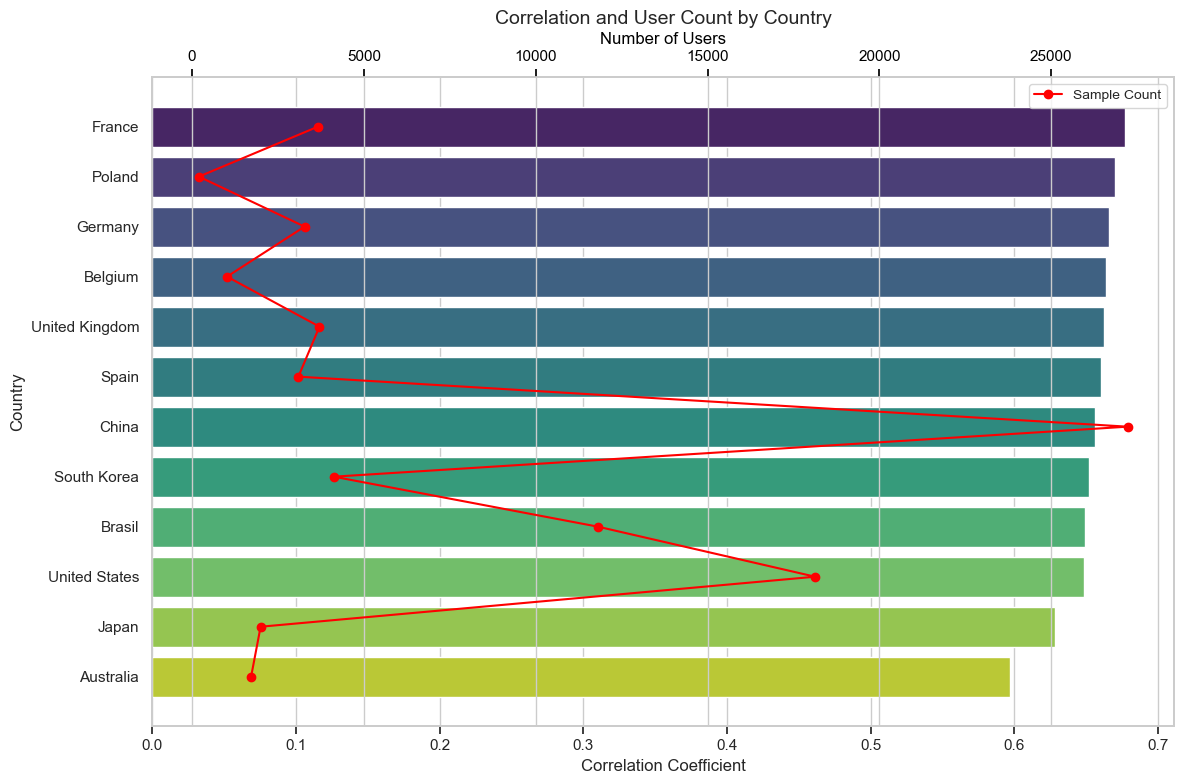

In [64]:
# Correlation and the number of users in the same chart

country_correlations = df.groupby('country').apply(
    lambda group: group['total_events'].corr(group['total_sales'])
).reset_index(name='correlation')

excluded_countries = ['Austria', 'Colombia', 'España']
country_correlations = country_correlations[~country_correlations['country'].isin(excluded_countries)]

country_correlations = country_correlations.sort_values(by='correlation', ascending=False)

country_sample_counts = df.groupby('country').size().reset_index(name='sample_count')

country_sample_counts = country_sample_counts.set_index('country').reindex(
    country_correlations['country']
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(
    x='correlation', 
    y='country', 
    data=country_correlations, 
    palette='viridis', 
    ax=ax1
)
ax1.set_xlabel('Correlation Coefficient', fontsize=12)
ax1.set_ylabel('Country', fontsize=12)
ax1.set_title('Correlation and User Count by Country', fontsize=14)
ax1.tick_params(axis='x')

ax2 = ax1.twiny()
ax2.plot(
    country_sample_counts['sample_count'], 
    country_sample_counts['country'], 
    color='red', 
    marker='o', 
    label='Sample Count'
)
ax2.set_xlabel('Number of Users', fontsize=12, color='black')
ax2.tick_params(axis='x', colors='black')

ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [16]:
# Correlation difference in gender
# The correlation is almost the same in each gender
# The number of users is also almost the same

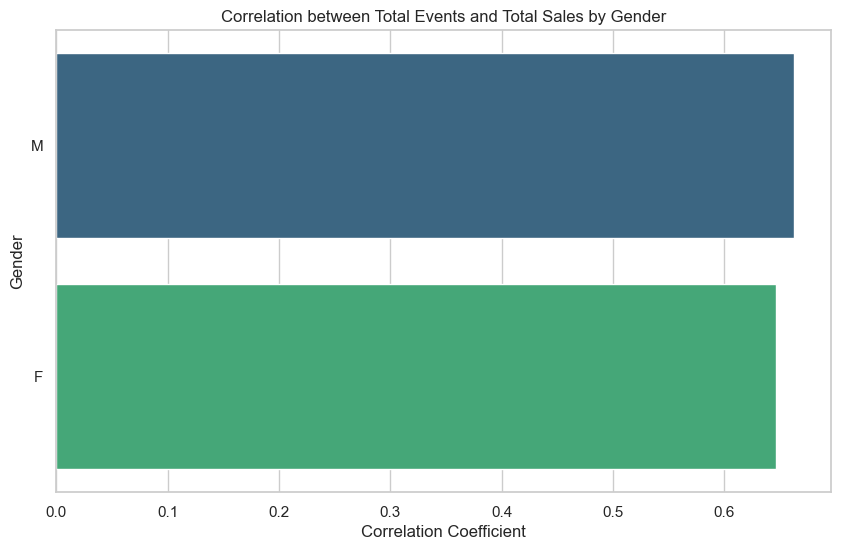

In [68]:
# Correlation difference in gender
# Almost the same in each gender

order = ['M'] + [g for g in gender_correlations['gender'] if g != 'M']
gender_correlations['gender'] = pd.Categorical(gender_correlations['gender'], categories=order, ordered=True)

gender_correlations = gender_correlations.sort_values('gender')

plt.figure(figsize=(10, 6))
sns.barplot(x='correlation', y='gender', data=gender_correlations, palette='viridis')
plt.title('Correlation between Total Events and Total Sales by Gender')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Gender')
plt.show()

In [18]:
# The number of users in each gender
# Almost the same in each gender

gender_sample_counts = df.groupby('gender').size().reset_index(name='sample_count')

print(gender_sample_counts)

  gender  sample_count
0      F         40039
1      M         39929


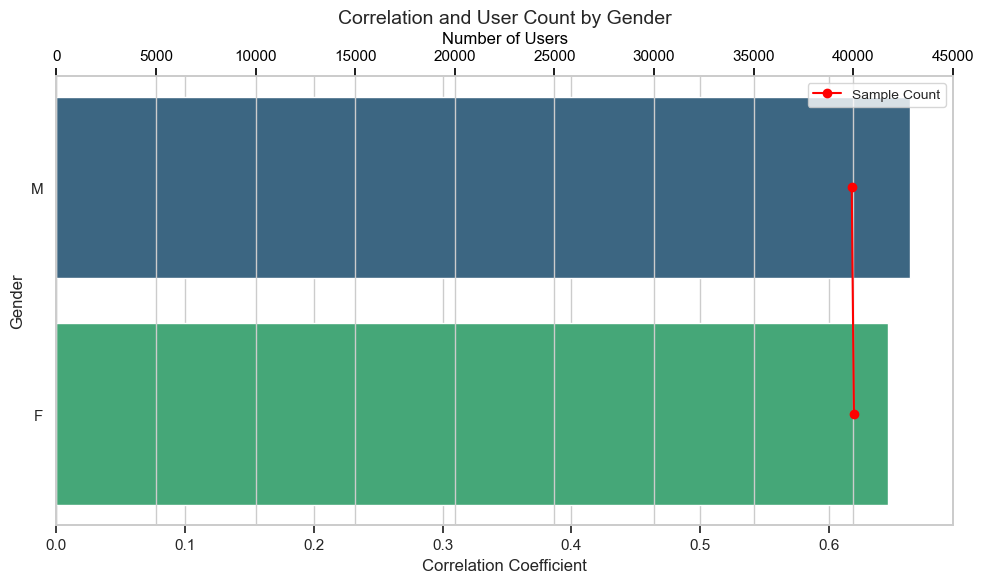

In [62]:
# Correlation and the number of users in the same chart

gender_correlations = df.groupby('gender').apply(
    lambda group: group['total_events'].corr(group['total_sales'])
).reset_index(name='correlation')

gender_sample_counts = df.groupby('gender').size().reset_index(name='sample_count')

gender_sample_counts = gender_sample_counts.sort_values(by='sample_count', ascending=True)
gender_correlations = gender_correlations.set_index('gender').reindex(
    gender_sample_counts['gender']
).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(
    x='correlation', 
    y='gender', 
    data=gender_correlations, 
    palette='viridis', 
    ax=ax1
)
ax1.set_xlabel('Correlation Coefficient', fontsize=12)
ax1.set_ylabel('Gender', fontsize=12)
ax1.set_title('Correlation and User Count by Gender', fontsize=14)
ax1.tick_params(axis='x')

ax2 = ax1.twiny()
ax2.plot(
    gender_sample_counts['sample_count'], 
    gender_sample_counts['gender'], 
    color='red', 
    marker='o', 
    label='Sample Count'
)
ax2.set_xlim(0, 45000)
ax2.set_xlabel('Number of Users', fontsize=12, color='black')
ax2.tick_params(axis='x', colors='black')

ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

In [20]:
# Correlation difference in traffic source
# The correlation in each traffic source is not significantly different, but Facebook and Email are slightly higher than the others
# However, most of the traffic methods used are Search and Organic
# So, improving marketing performance is possible by switching traffic sources from Search and Organic to Facebook and Email

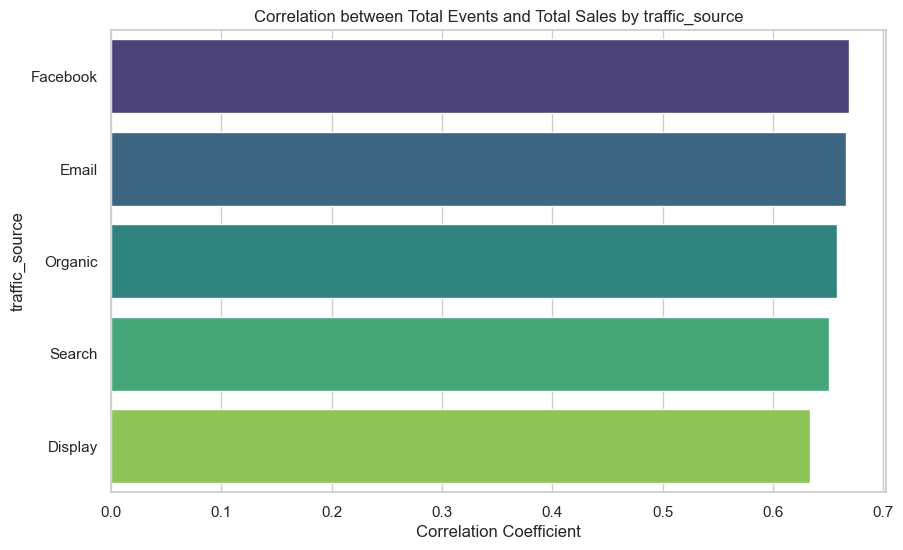

In [21]:
# Correlation difference in traffic sources

traffic_source_correlations = df.groupby('traffic_source').apply(
    lambda group: group['total_events'].corr(group['total_sales'])
).reset_index(name='correlation')

traffic_source_correlations = traffic_source_correlations.sort_values(by='correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='correlation', y='traffic_source', data=traffic_source_correlations, palette='viridis')
plt.title('Correlation between Total Events and Total Sales by traffic_source')
plt.xlabel('Correlation Coefficient')
plt.ylabel('traffic_source')
plt.show()

In [22]:
# The number of users in each traffic source

traffic_source_sample_counts = df.groupby('traffic_source').size().reset_index(name='sample_count')

traffic_source_sample_counts = traffic_source_sample_counts.sort_values(by='sample_count', ascending=False)

print(traffic_source_sample_counts)

  traffic_source  sample_count
4         Search         55899
3        Organic         12103
2       Facebook          4846
1          Email          3964
0        Display          3156


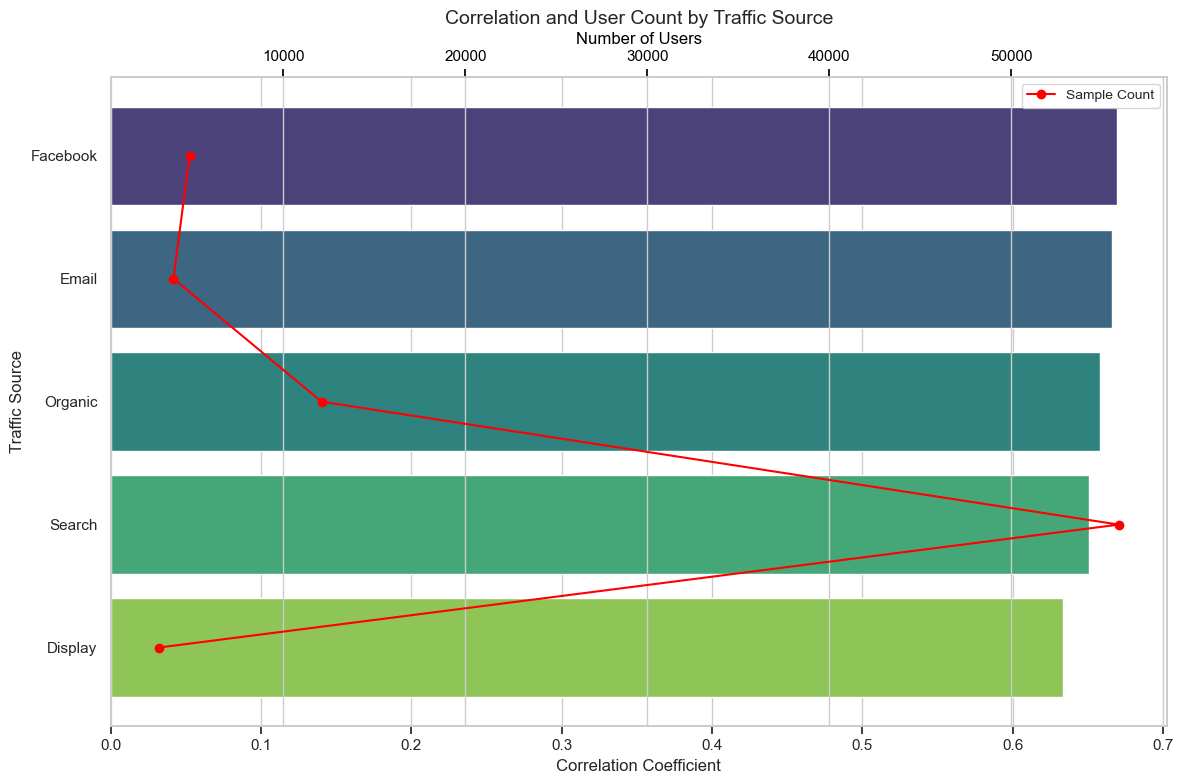

In [66]:
# Correlation and the number of users in the same chart

traffic_source_correlations = df.groupby('traffic_source').apply(
    lambda group: group['total_events'].corr(group['total_sales'])
).reset_index(name='correlation')

traffic_source_correlations = traffic_source_correlations.sort_values(by='correlation', ascending=False)

traffic_source_sample_counts = df.groupby('traffic_source').size().reset_index(name='sample_count')

traffic_source_sample_counts = traffic_source_sample_counts.set_index('traffic_source').reindex(
    traffic_source_correlations['traffic_source']
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(
    x='correlation', 
    y='traffic_source', 
    data=traffic_source_correlations, 
    palette='viridis', 
    ax=ax1
)
ax1.set_xlabel('Correlation Coefficient', fontsize=12)
ax1.set_ylabel('Traffic Source', fontsize=12)
ax1.set_title('Correlation and User Count by Traffic Source', fontsize=14)
ax1.tick_params(axis='x')

ax2 = ax1.twiny()
ax2.plot(
    traffic_source_sample_counts['sample_count'], 
    traffic_source_sample_counts['traffic_source'], 
    color='red', 
    marker='o', 
    label='Sample Count'
)
ax2.set_xlabel('Number of Users', fontsize=12, color='black')
ax2.tick_params(axis='x', colors='black')

ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()